In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 5)

In [2]:
path = '/data/Dropbox/Data/Asylum_Courts/tbl_schedule'

In [3]:
cols = ["IDNSCHEDULE","IDNPROCEEDING","IDNCASE","OSC_DATE","GENERATION","SUB_GENERATION","REC_TYPE","ALIEN_ATTY_CODE","LANG","HEARING_LOC_CODE","BASE_CITY_CODE","IJ_CODE","INTERPRETER_CODE","INPUT_DATE","INPUT_TIME","UPDATE_DATE","UPDATE_TIME","ASSIGNMENT_PATH","CONTINUE_FLAG","CAL_TYPE","ADJ_DATE","ADJ_TIME_START","ADJ_TIME_STOP","ADJ_RSN","ADJ_MEDIUM","ADJ_MSG","ADJ_ELAP_DAYS","ID_1","LNGSESSNID","SCHEDULE_TYPE","NOTICE_CODE","DATBATCHMODIFIED","STRCREATEDBY","STRMODIFIEDBY","BLNCLOCKOVERRIDE","EOIRAttorneyID"]
cols = [x.lower() for x in cols]

In [4]:
sched_tbl = pd.read_csv(path + '/tbl_schedule_01.csv', header=None, names=cols, encoding='ISO-8859-1', low_memory=False, dtype={'adj_date':'str', 'adj_time_start':'str', 'adj_time_stop':'str'})

In [6]:
sched_tbl.count()

idnschedule         7710560
idnproceeding       7710542
idncase             7710560
osc_date            7707682
generation          7709369
sub_generation       592617
rec_type            7710530
alien_atty_code     4259127
lang                7288862
hearing_loc_code    7710558
base_city_code      7710558
ij_code             7709156
interpreter_code      10772
input_date          7710558
input_time          7710203
update_date         7710556
update_time         7710536
assignment_path      387076
continue_flag             0
cal_type            7706235
adj_date            7710560
adj_time_start      7710558
adj_time_stop       6728583
adj_rsn             6672863
adj_medium          7508811
adj_msg             1923835
adj_elap_days       2719424
id_1                1594869
lngsessnid          5686379
schedule_type       7710559
notice_code         5453180
datbatchmodified     292701
strcreatedby        7710205
strmodifiedby       7697821
blnclockoverride    7710560
eoirattorneyid      

In [7]:
sched_tbl.head(5)

,idnschedule,idnproceeding,idncase,osc_date,generation,sub_generation,rec_type,alien_atty_code,lang,hearing_loc_code,...,adj_elap_days,id_1,lngsessnid,schedule_type,notice_code,datbatchmodified,strcreatedby,strmodifiedby,blnclockoverride,eoirattorneyid
0,17035561,961394.0,2706979,1995-06-30 00:00:00,99.0,NaN,X,GLI,CV,BOS,...,0000,RVG,NaN,--,NaN,NaN,ADMIN,ADMIN,False,{64B26B92-3683-E211-AC6D-F4CE46838609}
1,17035562,961398.0,2706991,1991-01-18 00:00:00,99.0,NaN,X,,ENG,BOS,...,0000,TP,NaN,--,NaN,NaN,ADMIN,ADMIN,False,NaN
2,17035563,961402.0,2707014,1995-05-17 00:00:00,96.0,NaN,X,GAL,ENG,BOS,...,0000,GET,NaN,--,NaN,NaN,ADMIN,ADMIN,False,{50B26B92-3683-E211-AC6D-F4CE46838609}
3,17035564,961405.0,2707014,1995-05-17 00:00:00,99.0,NaN,X,GAL,UNK,BOS,...,0000,GET,NaN,--,NaN,NaN,ADMIN,ADMIN,False,{50B26B92-3683-E211-AC6D-F4CE46838609}
4,17035565,961406.0,2707020,1996-03-12 00:00:00,97.0,NaN,X,SAN,ENG,BOS,...,0000,GET,NaN,--,NaN,NaN,ADMIN,ADMIN,False,{5E250E92-3683-E211-AC6D-F4CE46838609}


In [128]:
sched_tbl2 = sched_tbl[['idnschedule','idnproceeding','idncase','osc_date','ij_code','cal_type','adj_date','adj_time_start','adj_time_stop','adj_rsn','notice_code','eoirattorneyid']]

In [129]:
sched_tbl2 = sched_tbl2.dropna(subset=['idnschedule', 'idnproceeding', 'idncase', 'adj_date'])
sched_tbl2.count()

idnschedule       7710542
idnproceeding     7710542
idncase           7710542
osc_date          7707664
ij_code           7709138
cal_type          7706217
adj_date          7710542
adj_time_start    7710540
adj_time_stop     6728571
adj_rsn           6672852
notice_code       5453180
eoirattorneyid    4157165
dtype: int64

In [130]:
#sched_tbl2['adj_date'] = sched_tbl2['adj_date'].astype('str')
sched_tbl2['adj_date'] = pd.to_datetime(sched_tbl2['adj_date'])

In [131]:
sched_tbl2['adj_time_start'] = sched_tbl2['adj_time_start'].str.zfill(4)
sched_tbl2['adj_time_stop'] = sched_tbl2['adj_time_stop'].str.zfill(4)

In [118]:
#sched_tbl2['adj_time_start'] = sched_tbl2['adj_time_start'].str[:2] + ':' + sched_tbl2['adj_time_start'].str[2:]
#sched_tbl2['adj_time_stop'] = sched_tbl2['adj_time_stop'].str[:2] + ':' +sched_tbl2['adj_time_stop'].str[2:]

In [132]:
sched_tbl2['adj_time_start'] = pd.to_datetime(sched_tbl2['adj_time_start'], format='%H%M', errors='coerce')
sched_tbl2['adj_time_stop'] = pd.to_datetime(sched_tbl2['adj_time_stop'], format='%H%M', errors='coerce')
#sched_tbl2['adj_time_start'] = pd.to_timedelta(sched_tbl2['adj_time_start'], errors='coerce')

In [133]:
sched_tbl2['adj_time_start'].head(5)

0   1900-01-01 13:00:00
1   1900-01-01 08:30:00
2   1900-01-01 13:00:00
3   1900-01-01 09:00:00
4   1900-01-01 13:00:00
Name: adj_time_start, dtype: datetime64[ns]

In [146]:
# extract adj_date year-month-day portion
d = sched_tbl2['adj_date'].dt.strftime('%Y-%m-%d')

#pd.to_datetime(sched_tbl2['adj_time_start'].dt.strftime('{} %H:%M:%S'.format(sched_tbl2['adj_date'])))
#a.strftime('{} %H:%M:%S'.format(b.strftime('%Y-%m-%d')))
d.head(5)

0    1996-11-27
1    1991-05-21
2    1997-04-02
3    1996-04-16
4    2003-01-08
Name: adj_date, dtype: object

In [156]:
sched_tbl2.loc[sched_tbl2.adj_time_start.dt.hour == 0, 'adj_time_start'] = pd.NaT
sched_tbl2.loc[sched_tbl2.adj_time_stop.dt.hour == 0, 'adj_time_stop'] = pd.NaT

In [157]:
sched_tbl2.loc[sched_tbl2.adj_time_start.dt.hour < 6, 'adj_time_start'] += pd.to_timedelta(12, unit='h')
sched_tbl2.loc[sched_tbl2.adj_time_stop.dt.hour < 6, 'adj_time_stop'] += pd.to_timedelta(5, unit='h')

In [158]:
t_start = sched_tbl2['adj_time_start'].dt.strftime('%H:%M:%S')
t_stop = sched_tbl2['adj_time_stop'].dt.strftime('%H:%M:%S')
#sched_tbl2['adj_time_start'] = sched_tbl2['adj_time_start'].transform(lambda x: x.strftime('{} %H:%M:%S'.format(d)))

In [159]:
sched_tbl2['adj_time_start2'] = pd.to_datetime(d + " " + t_start, errors='coerce')
sched_tbl2['adj_time_stop2'] = pd.to_datetime(d + " " + t_stop, errors='coerce')

In [160]:
sched_tbl2.head(10)

,idnschedule,idnproceeding,idncase,osc_date,ij_code,cal_type,adj_date,adj_time_start,adj_time_stop,adj_rsn,notice_code,eoirattorneyid,adj_time_start2,adj_time_stop2
0,17035561,961394.0,2706979,1995-06-30 00:00:00,LIS,M,1996-11-27,1900-01-01 13:00:00,1900-01-01 14:30:00,01,NaN,{64B26B92-3683-E211-AC6D-F4CE46838609},1996-11-27 13:00:00,1996-11-27 14:30:00
1,17035562,961398.0,2706991,1991-01-18 00:00:00,LIS,M,1991-05-21,1900-01-01 08:30:00,1900-01-01 09:00:00,14,NaN,NaN,1991-05-21 08:30:00,1991-05-21 09:00:00
2,17035563,961402.0,2707014,1995-05-17 00:00:00,BWD,M,1997-04-02,1900-01-01 13:00:00,1900-01-01 16:30:00,NaN,NaN,{50B26B92-3683-E211-AC6D-F4CE46838609},1997-04-02 13:00:00,1997-04-02 16:30:00
3,17035564,961405.0,2707014,1995-05-17 00:00:00,PS,M,1996-04-16,1900-01-01 09:00:00,1900-01-01 10:30:00,NaN,NaN,{50B26B92-3683-E211-AC6D-F4CE46838609},1996-04-16 09:00:00,1996-04-16 10:30:00
4,17035565,961406.0,2707020,1996-03-12 00:00:00,ECK,I,2003-01-08,1900-01-01 13:00:00,1900-01-01 16:00:00,04,NaN,{5E250E92-3683-E211-AC6D-F4CE46838609},2003-01-08 13:00:00,2003-01-08 16:00:00
5,17035566,961407.0,2707020,1996-03-12 00:00:00,ECK,M,2001-03-15,1900-01-01 09:00:00,1900-01-01 09:30:00,01,NaN,{5E250E92-3683-E211-AC6D-F4CE46838609},2001-03-15 09:00:00,2001-03-15 09:30:00
6,17035567,961409.0,2707025,1995-07-25 00:00:00,BWD,M,1996-10-29,1900-01-01 13:00:00,1900-01-01 14:30:00,03,NaN,{50B26B92-3683-E211-AC6D-F4CE46838609},1996-10-29 13:00:00,1996-10-29 14:30:00
7,17035568,961410.0,2707031,1990-08-23 00:00:00,KAB,I,1991-09-24,1900-01-01 13:00:00,1900-01-01 16:00:00,NaN,NaN,{50B26B92-3683-E211-AC6D-F4CE46838609},1991-09-24 13:00:00,1991-09-24 16:00:00
8,17035569,961412.0,2707037,1994-12-20 00:00:00,TMR,M,1995-08-09,1900-01-01 09:00:00,1900-01-01 10:30:00,NaN,NaN,NaN,1995-08-09 09:00:00,1995-08-09 10:30:00
9,17035570,961413.0,2707042,1994-10-03 00:00:00,LIS,M,1995-02-01,1900-01-01 13:00:00,1900-01-01 16:30:00,01,NaN,NaN,1995-02-01 13:00:00,1995-02-01 16:30:00


In [169]:
sched_tbl2['durationHearing'] = sched_tbl2['adj_time_stop2'] - sched_tbl2['adj_time_start2']

In [170]:
sched_tbl2[sched_tbl2.adj_time_stop2 < sched_tbl2.adj_time_start2].count()

idnschedule        2555
idnproceeding      2555
idncase            2555
osc_date           2555
ij_code            2555
cal_type           2555
adj_date           2555
adj_time_start     2555
adj_time_stop      2555
adj_rsn            1944
notice_code         173
eoirattorneyid     1581
adj_time_start2    2555
adj_time_stop2     2555
durationHearing    2555
dtype: int64

In [171]:
# converting the unit to minutes
sched_tbl2['durationHearing'] = sched_tbl2['durationHearing'].astype('timedelta64[m]')

In [172]:
sched_tbl2 = sched_tbl2[sched_tbl2.durationHearing >= 0]

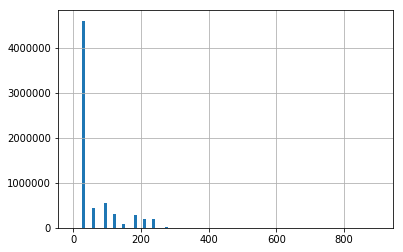

In [173]:
sched_tbl2['durationHearing'].hist(bins=100)
plt.show()

In [177]:
sched_tbl2 = sched_tbl2.drop(columns=['adj_time_start', 'adj_time_stop'], axis=1)

In [181]:
sched_tbl2.to_csv('../detailed_schedule.csv', index=False)